In [33]:
import pandas as pd
df=pd.read_excel('/Users/Ruby/Desktop/tw 2.xlsx')
df

,h,low,close,a
2017/01/04,184.0,181.5,183.0,182.75
2017/01/05,183.5,181.5,183.5,182.50
2017/01/06,184.5,183.5,184.0,184.00
2017/01/09,185.0,183.0,184.0,184.00
2017/01/10,185.5,183.5,184.0,184.50
2017/01/11,185.0,181.5,182.0,183.25
2017/01/12,185.5,182.5,184.5,184.00
2017/01/13,182.5,180.5,181.5,181.50
2017/01/16,180.5,179.0,179.5,179.75
2017/01/17,181.0,179.5,181.0,180.25


In [34]:
import talib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
def MACD(price, fast=12, slow=26, signalperiod=9):
    ewma12 = pd.ewma(price,span=fast)#ewma為指數加權移動平均，是pandas裡面的套件
    ewma26 = pd.ewma(price,span=slow)
    dif = ewma12-ewma26#dif公式：12日加權移動平均值-26日加權移動平均值
    dea = pd.ewma(dif,span=signalperiod)#dea公式：dif的9日加權移動平均值
    return dif,dea

In [36]:
dif,dea = MACD(df['close'].values, fast=12, slow=26)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  """


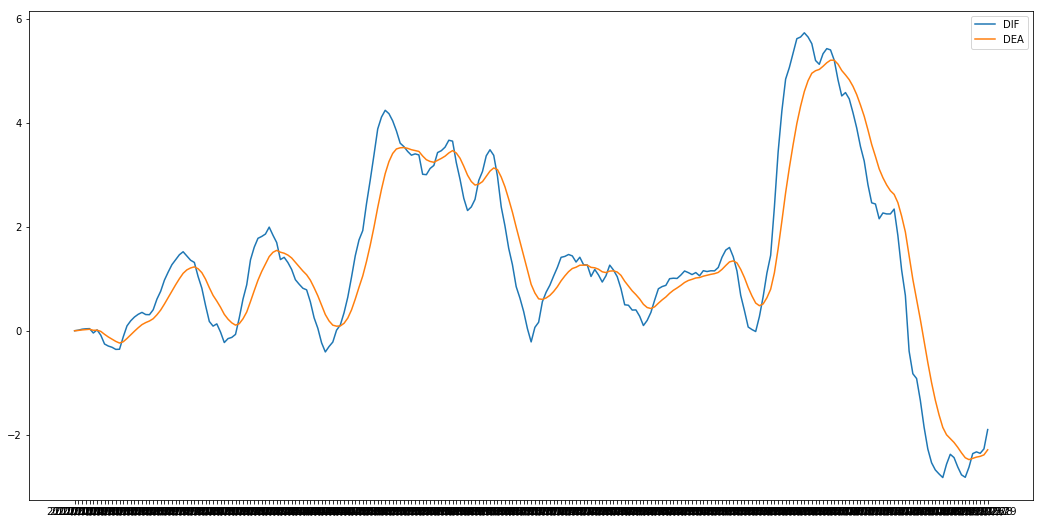

In [37]:
fig = plt.figure(figsize=[18,9])
plt.plot(df.index,dif,label='DIF')
plt.plot(df.index,dea,label='DEA')
plt.legend(loc='best')


In [38]:
a=np.array([100.0]) #資金的總額，假設每次買賣皆all in
tmp=[]
dec=False #判斷式 判斷是買入or賣出。若狀態為'買入'，則dec=True，避免出現連續買入。
          #直到賣出後，dec變為False，代表狀態為賣出，並過濾掉重複賣出的狀況。
for i in range(1,len(dif)):
    
    if all([(dif[i]-dea[i])-(dif[i-1]-dea[i-1])>0.0  and dec!=True ]): #當（今日離差-昨日離差）>0         
        print('buy')
        print(df.close[i]) #印出買入當日收盤價
        tmp.append(df.close[i]) #將買入當日的收盤價存入tmp的list中
        dec=True #若買進，則dec為True，之後跑if時就不會出現連續買入的狀況

    elif all([ (dif[i]-dea[i])-(dif[i-1]-dea[i-1])<0.0 and dif[i-1]<0 and dea[i-1]<0 and dec!= False ]):
       ## 當（今日離差-昨日離差）<0 且昨日dif、dea值都<0                           
        print('sell')
        print(df.close[i]) #印出賣出當日收盤價
        tmp.append(df.close[i]) #將賣出當日的收盤價存入tmp的list中

        growth=(tmp[-1])/(tmp[-2]) #計算成長率=賣出日股價/買入日股價
        a=np.append(a,a[-1]*growth) #將所有現金*成長率加入a的list中
        dec=False
b = (a[-1]-100) #計算報酬率
print(a) #印出所有擁有過的資金總額
b = (a[-1]-100) #計算報酬率
print(a) #印出所有擁有過的資金總額
print('報酬率為：',b,'%') #印出報酬率

buy
183.5
sell
179.5
buy
181.0
sell
226.5
buy
227.0
sell
225.0
buy
225.0
sell
225.0
buy
226.0
[100.          97.82016349 122.41031508 121.3318101  121.3318101 ]
[100.          97.82016349 122.41031508 121.3318101  121.3318101 ]
報酬率為： 21.331810104020008 %
